In [23]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/home/huong/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/huong/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
print(train_data.shape, train_labels.shape)

print(test_data.shape, train_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


In [3]:
# each word is a key in a dict and is represented by its dict value
# this code is to decode it back to text

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for
                           (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for
                          i in train_data[4]])

In [4]:
print(decoded_review)

? worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the ? and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, index in enumerate(sequences):
        results[i, index] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Create a numpy array that represents the input data as vectors of 0s and 1s. 

The length of each row is the number of words in the dict, which is 10000, the value of each word is its index in the array.

If a word appears in the piece of text, its value is 1. Other wise, it is 0.

In [6]:
print(x_train[8], x_train.shape)


[0. 1. 1. ... 0. 0. 0.] (25000, 10000)


In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# remember to vectorize labels

In [8]:
print(type(x_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
# sigmoid is similar to softmax but for binary classification

In [10]:
from keras import optimizers, losses, metrics

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
            # this loss function is specialized for binary output
             metrics=[metrics.binary_accuracy])


In [11]:
history = network.fit(x_train, y_train,
                      epochs=20,
                      batch_size=512,
                      validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 1s 17ms/step - loss: 0.4973 - binary_accuracy: 0.7897 - val_loss: 0.3792 - val_binary_accuracy: 0.8506
Epoch 2/20
40/40 [==============================] - 1s 14ms/step - loss: 0.2837 - binary_accuracy: 0.9060 - val_loss: 0.3054 - val_binary_accuracy: 0.8846
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 0.2108 - binary_accuracy: 0.9288 - val_loss: 0.3454 - val_binary_accuracy: 0.8614
Epoch 4/20
40/40 [==============================] - 1s 15ms/step - loss: 0.1710 - binary_accuracy: 0.9422 - val_loss: 0.2756 - val_binary_accuracy: 0.8954
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 0.1441 - binary_accuracy: 0.9513 - val_loss: 0.2919 - val_binary_accuracy: 0.8906
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 0.1210 - binary_accuracy: 0.9597 - val_loss: 0.3210 - val_binary_accuracy: 0.8840
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - los

In [12]:
history_dict = history.history

# the model.fit function returns a history of results
# of the training of each epoch

In [13]:
print(history_dict.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


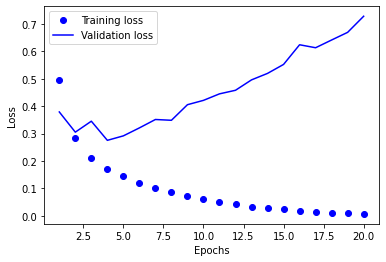

In [14]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

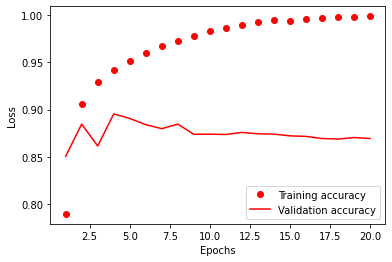

In [15]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The validation accuracy seems to peak at the 4th epoch. This is because the model overfitted.

It's only optimizing on the training data but not generalize on the data outside of the training set.

Therefore we stop training at the 4th epoch.

In [16]:
history = network.fit(x_train, y_train,
                      epochs=4,
                      batch_size=512,
                      validation_split=0.2)

Epoch 1/4
40/40 [==============================] - 1s 14ms/step - loss: 0.0036 - binary_accuracy: 0.9998 - val_loss: 0.7408 - val_binary_accuracy: 0.8678
Epoch 2/4
40/40 [==============================] - 1s 15ms/step - loss: 0.0055 - binary_accuracy: 0.9987 - val_loss: 0.8031 - val_binary_accuracy: 0.8696
Epoch 3/4
40/40 [==============================] - 1s 16ms/step - loss: 0.0018 - binary_accuracy: 0.9998 - val_loss: 0.8657 - val_binary_accuracy: 0.8618
Epoch 4/4
40/40 [==============================] - 1s 14ms/step - loss: 0.0048 - binary_accuracy: 0.9986 - val_loss: 0.8684 - val_binary_accuracy: 0.8692


In [17]:
results = network.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.9606 - binary_accuracy: 0.8516


In [18]:
print(results)

[0.9605830311775208, 0.8515599966049194]


In [19]:
network.predict(x_test)

array([[1.7146319e-02],
       [1.0000000e+00],
       [1.9150972e-04],
       ...,
       [6.8706274e-02],
       [2.5162101e-04],
       [2.0313531e-02]], dtype=float32)

Final notes:

There are two ways to handle labels in multiclass classification:

Encoding the labels via categorical encoding and using categorical_crossentropy as a loss function.

Encoding the labels as integers and using the sparse_categorical_crossentropy loss function.

If you need to classify data into a large number of categories, avoid creating information bottlenecks in your network due to too small intermediate layers.

Experiment time yay!

Now we try to set up different layers and stuff to see if the model in the textbook is the best one.

In [20]:
experiment_model = models.Sequential()

In [21]:
experiment_model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
experiment_model.add(layers.Dense(16, activation='relu'))
experiment_model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
experiment_model.compile(optimizer=optimizers.RMSprop(lr=0.0005,
                                                        rho=0.9,
                                                        momentum=0.2,
                                                        epsilon=1e-07,
                                                        centered=True),
                             loss=losses.binary_crossentropy,
                             metrics=[metrics.binary_accuracy])
history = network.fit(x_train, y_train,
            epochs=5,
            batch_size=512,
            validation_split=0.4
            )
history_dict = history.history
print(history_dict.keys())


Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.0011 - binary_accuracy: 0.9999 - val_loss: 0.4474 - val_binary_accuracy: 0.9346
Epoch 2/5
30/30 [==============================] - 1s 18ms/step - loss: 7.8875e-04 - binary_accuracy: 0.9999 - val_loss: 0.4659 - val_binary_accuracy: 0.9340
Epoch 3/5
30/30 [==============================] - 1s 18ms/step - loss: 0.0058 - binary_accuracy: 0.9985 - val_loss: 0.4832 - val_binary_accuracy: 0.9330
Epoch 4/5
30/30 [==============================] - 1s 19ms/step - loss: 3.6975e-04 - binary_accuracy: 1.0000 - val_loss: 0.4997 - val_binary_accuracy: 0.9341
Epoch 5/5
30/30 [==============================] - 1s 17ms/step - loss: 2.9184e-04 - binary_accuracy: 1.0000 - val_loss: 0.5082 - val_binary_accuracy: 0.9332
dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])
